In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy.optimize import least_squares

In [2]:
cpm_path = "CPM_data_after_RC3.csv"

cpm_df = pd.read_csv(
    cpm_path,
    header=0,
    parse_dates=[0]
)

cpm_df["T_MXC"] = cpm_df["T_MXC"].replace(0, np.nan)

cpm_df.head(5)

,Time,P_50K,P_4K,P_Still,P_CP,P_MXC,T_50K,T_4K,T_Still,T_CP,T_MXC,P2,P3,P4,P5,Flow,Comment
0,2022-02-08 12:40:00,0,0,30,400,10,43.7105,3.26253,1.22060,0.147167,0.014964,0.0428,715.0,837.0,7.92,0.902051,NaN
1,2022-02-08 12:53:00,0,0,30,300,10,43.4956,3.25518,1.22036,0.134138,0.014862,0.0427,716.0,834.0,7.91,0.895464,NaN
2,2022-02-08 13:05:00,0,0,30,260,10,43.3244,3.25110,1.22072,0.128596,0.014822,0.0425,716.0,833.0,7.92,0.935441,NaN
3,2022-02-08 13:17:00,0,0,30,220,10,43.2221,3.24478,1.21983,0.122559,0.014789,0.0425,705.0,830.0,7.91,0.981655,NaN
4,2022-02-08 13:29:00,0,0,30,180,10,43.1335,3.24066,1.22073,0.116456,0.014740,0.0423,699.0,828.0,7.92,1.008853,NaN


In [17]:
temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    # "P_MXC == 30 &" +
    "P_CP == 0"
)
temp_df

,Time,P_50K,P_4K,P_Still,P_CP,P_MXC,T_50K,T_4K,T_Still,T_CP,T_MXC,P2,P3,P4,P5,Flow,Comment
9,2022-07-28 19:22:00,0,0,30,0,30,42.0982,3.21025,1.22078,0.082387,0.023387,0.0416,691,812,6.20,0.892505,NaN
16,2022-07-28 21:31:00,0,0,30,0,30,42.2496,3.23983,1.22325,0.082766,0.023378,0.0425,704,820,6.13,0.978134,NaN
35,2022-07-29 02:11:00,0,0,30,0,30,41.7456,3.20164,1.21950,0.082216,0.023359,0.0411,682,806,6.18,0.961637,NaN
42,2022-07-29 04:25:00,0,0,30,0,20,42.1104,3.23494,1.22292,0.081834,0.019551,0.0423,709,810,6.22,0.928930,NaN
61,2022-07-29 09:12:00,0,0,30,0,20,41.7695,3.19539,1.21887,0.081411,0.019530,0.0411,679,796,6.29,0.977679,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2022-07-15 23:01:00,0,0,30,0,30,41.3573,3.22548,1.22385,0.082476,0.023338,0.0419,694,801,3.50,0.882609,NaN
857,2022-07-15 23:14:00,0,0,30,0,30,41.3686,3.22826,1.22353,0.082557,0.023315,0.0419,696,800,3.51,0.906103,NaN
858,2022-07-15 23:26:00,0,0,30,0,30,41.3721,3.22554,1.22401,0.082503,0.023338,0.0420,699,799,3.51,0.961288,NaN
859,2022-07-15 23:38:00,0,0,30,0,30,41.3720,3.22636,1.22366,0.082464,0.023336,0.0419,705,798,3.51,0.998730,NaN


## Simple Plots

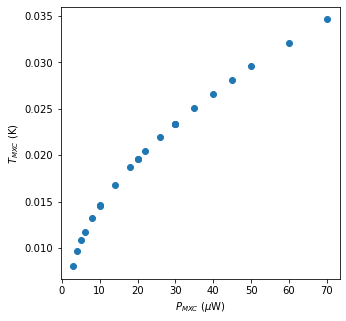

In [4]:
temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    "P_CP == 100"
)

x = temp_df["P_MXC"]
y = temp_df["T_MXC"]

fig, axs = plt.subplots(figsize=(5, 5))

axs.scatter(x, y)
axs.set_xlabel(r"$P_{MXC}$ ($\mu$W)")
axs.set_ylabel(r"$T_{MXC}$ (K)")

plt.show()

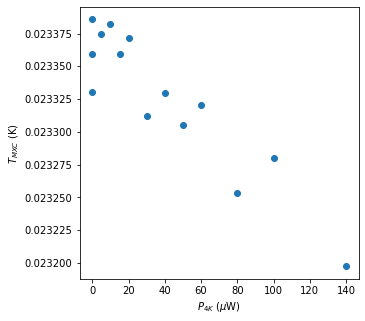

In [5]:
temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 300"
)

x = temp_df["P_4K"]
y = temp_df["T_MXC"]

fig, axs = plt.subplots(figsize=(5, 5))

axs.scatter(x, y)
axs.set_xlabel(r"$P_{4K}$ ($\mu$W)")
axs.set_ylabel(r"$T_{MXC}$ (K)")

plt.show()

<ipython-input-18-e359982ed9eb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==0] = np.nan


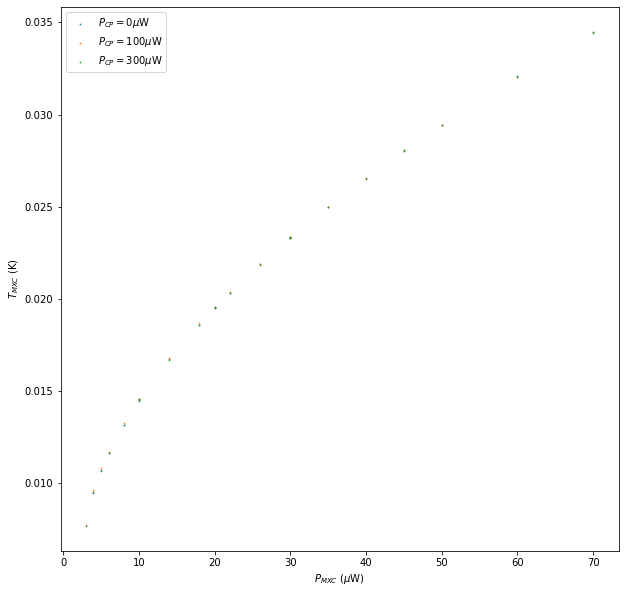

In [18]:
p_cp = [0, 100, 300]

fig, axs = plt.subplots(figsize=(10, 10))

for p in p_cp:
    temp_df = cpm_df.query(
        "P_50K == 0 &" +
        "P_4K == 0 &" +
        "P_Still == 30 &" +
        f"P_CP == {p}"
    )
    
    x = temp_df["P_MXC"]
    y = temp_df["T_MXC"]

    y[y==0] = np.nan

    axs.scatter(x, y, s=0.5)

axs.legend([r"$P_{CP} = 0\mu$W", r"$P_{CP} = 100\mu$W", r"$P_{CP} = 300\mu$W"])
axs.set_xlabel(r"$P_{MXC}$ ($\mu$W)")
axs.set_ylabel(r"$T_{MXC}$ (K)")

plt.show()

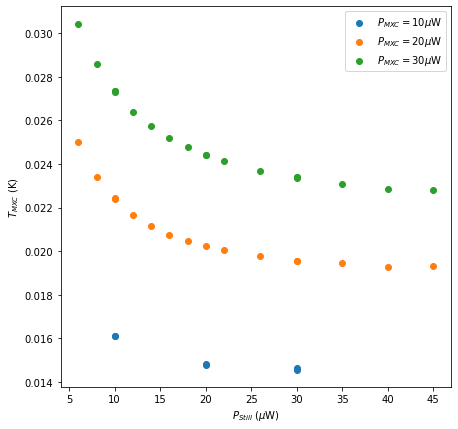

In [6]:
p_mxc = [10, 20, 30]

fig, axs = plt.subplots(figsize=(7, 7))

for p in p_mxc:
    temp_df = cpm_df.query(
        "P_50K == 0 &" +
        "P_4K == 0 &" +
        "P_CP == 100 &" +
        f"P_MXC == {p}"
    )
    
    x = temp_df["P_Still"]
    y = temp_df["T_MXC"]

    # y[y==0] = np.nan

    axs.scatter(x, y)

axs.legend([r"$P_{MXC} = 10\mu$W", r"$P_{MXC} = 20\mu$W", r"$P_{MXC} = 30\mu$W"])
axs.set_xlabel(r"$P_{Still}$ ($\mu$W)")
axs.set_ylabel(r"$T_{MXC}$ (K)")

plt.show()

In [4]:
cpm_df["P_4K"].max()

300

In [58]:
y[0].iloc[0]

0.0

In [63]:
x.idxmin()

522

In [5]:
viridis = mpl.colormaps['viridis']

In [25]:
for xi, yi in zip(x, y):
    if (yi < 1.1) and (yi > 1):  print((xi, yi))

(3.09883, 1.0309)
(3.11229, 1.06178)
(3.13019, 1.0885)
(3.15455, 1.09117)
(3.13592, 1.06368)
(3.11695, 1.03309)
(3.09405, 1.03111)
(3.11137, 1.06154)
(3.12802, 1.08886)
(3.16274, 1.09029)
(3.14612, 1.06399)
(3.12796, 1.03314)
(3.09465, 1.03023)
(3.11111, 1.06141)
(3.12956, 1.0887)
(3.16151, 1.091)
(3.14243, 1.06439)
(3.12317, 1.03339)
(3.18821, 1.00665)
(3.20894, 1.04056)
(3.22854, 1.07159)
(3.24708, 1.09721)
(3.35123, 1.07993)
(3.3386, 1.05029)
(3.32075, 1.01861)
(3.36761, 1.02106)
(3.39579, 1.05524)
(3.41305, 1.08315)
(3.52779, 1.09192)
(3.51567, 1.06336)
(3.48484, 1.02902)


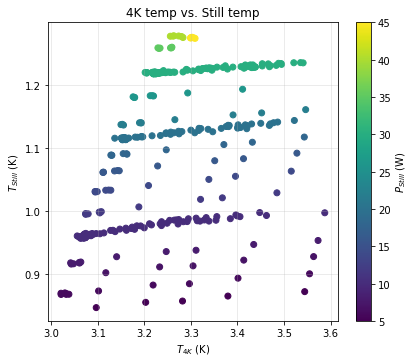

In [22]:
fig, axs = plt.subplots(figsize=(6.5, 5.5))

temp_df = cpm_df

x = temp_df["T_4K"]
y = temp_df["T_Still"]
# c = temp_df["P_4K"]
c = temp_df["P_Still"]

# viridis = mpl.colormaps['viridis']
# c = viridis(c)

s = axs.scatter(x, y, c=c, cmap='viridis')

axs.grid(True, "major", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "x", lw=0.5, alpha=0.5)

axs.set_xlabel(r"$T_{4K}$ (K)")
axs.set_ylabel(r"$T_{Still}$ (K)")

cb = fig.colorbar(s, ax=axs)

cb.set_label(r"$P_{Still}$ (W)")
axs.set_title("4K temp vs. Still temp")

plt.show()

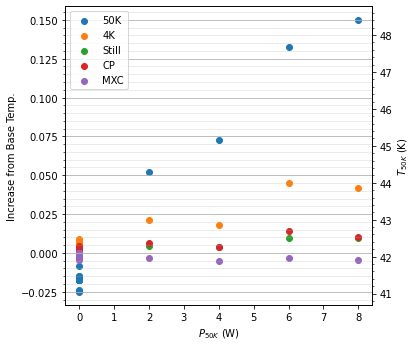

In [24]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    # "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

x = temp_df["P_50K"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x.idxmin()
y_0 = y[0][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

axs2 = axs.twinx()
axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{50K}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
axs2.set_ylabel(r"$T_{50K}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-02/P50KvsAll.png", dpi=400, bbox_inches="tight")

plt.show()


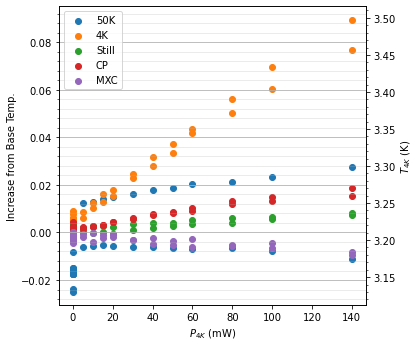

In [25]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    # "P_4K == 100 &" +
    "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

x = temp_df["P_4K"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x.idxmin()
y_0 = y[1][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

axs2 = axs.twinx()
axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{4K}$ (mW)")
axs.set_ylabel("Increase from Base Temp.")
axs2.set_ylabel(r"$T_{4K}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-02/P4KvsAll.png", dpi=400, bbox_inches="tight")

plt.show()

In [15]:
cpm_path = "CPM_data_after_RC (corrected).csv"

cpm_df = pd.read_csv(
    cpm_path,
    header=0,
    parse_dates=[0]
)

cpm_df["T_MXC"] = cpm_df["T_MXC"].replace(0, np.nan)

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    # "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)
temp_df

,Time,P_50K,P_4K,P_Still,P_CP,P_MXC,T_50K,T_4K,T_Still,T_CP,T_MXC,P2,P3,P4,P5,Flow,Comment
46,2022-07-11 20:52:00,0.0,0.0,45.0,0.0,30.0,41.4363,3.29889,1.27650,0.086174,0.022771,0.0549,828.0,914.0,2.62,1.006819,NaN
47,2022-07-11 21:22:00,0.0,0.0,40.0,0.0,30.0,41.4465,3.27223,1.28037,0.084830,0.022837,0.0485,763.0,840.0,2.62,1.006819,NaN
48,2022-07-11 21:41:00,0.0,0.0,35.0,0.0,30.0,41.4016,3.24711,1.26372,0.083945,0.023066,0.0455,717.0,801.0,2.63,1.006819,NaN
49,2022-07-11 21:54:00,0.0,0.0,30.0,0.0,30.0,41.3947,3.22747,1.22467,0.082587,0.023342,0.0418,694.0,781.0,2.63,1.006819,NaN
50,2022-07-11 22:08:00,0.0,0.0,26.0,0.0,30.0,41.3478,3.21269,1.18986,0.081261,0.023633,0.0389,679.0,760.0,2.63,1.006819,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2022-07-16 19:09:00,0.0,0.0,10.0,0.0,30.0,40.8361,3.06801,0.96146,0.072442,0.027248,0.0217,586.0,658.0,3.71,0.618101,NaN
493,2022-07-16 19:21:00,0.0,0.0,10.0,0.0,30.0,40.8447,3.06835,0.96186,0.072447,0.027234,0.0217,582.0,658.0,3.72,0.629484,NaN
494,2022-07-16 19:34:00,0.0,0.0,10.0,0.0,30.0,40.8712,3.06368,0.96116,0.072434,0.027252,0.0217,578.0,657.0,3.72,0.604184,NaN
495,2022-07-16 19:46:00,0.0,0.0,10.0,0.0,30.0,40.8723,3.06461,0.96122,0.072348,0.027288,0.0217,582.0,656.0,3.72,0.582389,NaN


In [23]:
temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still <= 35 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

y = temp_df["P_Still"]
x = temp_df["T_Still"]

fit_func = lambda beta, x: beta[0]*(x-beta[1])**2 - beta[2]
res_func = lambda beta, x, y: fit_func(beta, x)- y

res_lsq = least_squares(res_func, x0=[0, 0, 0], args=(x, y))
beta = res_lsq.x
beta

array([99.2536871 ,  0.70439928, -3.16565894])

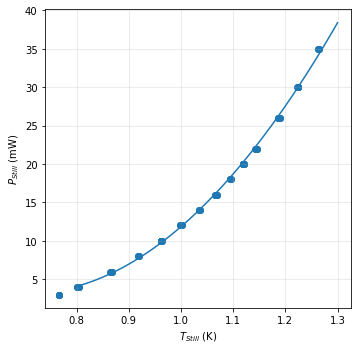

In [26]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still <= 35 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

y = temp_df["P_Still"]
x = temp_df["T_Still"]

axs.scatter(x, y)

x = np.linspace(0.8, 1.3, 100)
axs.plot(x, fit_func(beta, x))

axs.grid(True, "major", "x", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y", lw=0.5, alpha=0.5)

axs.set_xlabel(r"$T_{Still}$ (K)")
axs.set_ylabel(r"$P_{Still}$ (mW)")

plt.show()

In [28]:
fit_func(beta, 1.03111)

13.759987213353964

In [33]:
((15.95477-13.759987)*10**(-3))/(2.45231-2.06294)

0.005636754244035235

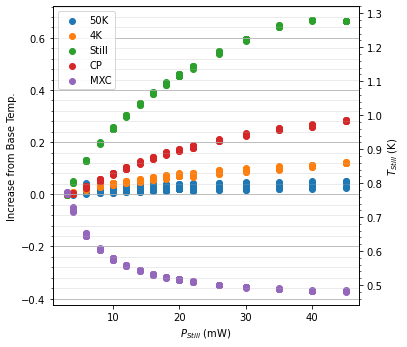

In [26]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    # "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

x = temp_df["P_Still"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x.idxmin()
y_0 = y[2][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

axs2 = axs.twinx()
axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{Still}$ (mW)")
axs.set_ylabel("Increase from Base Temp.")
axs2.set_ylabel(r"$T_{Still}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-02/PStillvsAll.png", dpi=400, bbox_inches="tight")

plt.show()

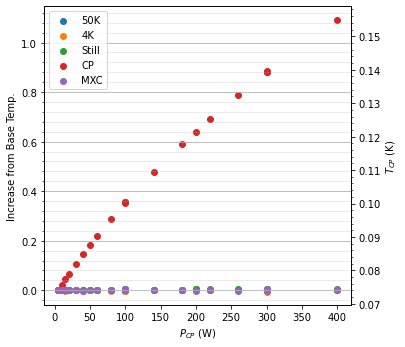

In [4]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 10 &" +
    # "P_CP == 300 &" +
    "P_MXC == 30"
)

x = temp_df["P_CP"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x.idxmin()
y_0 = y[3][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

axs2 = axs.twinx()
axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{CP}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
axs2.set_ylabel(r"$T_{CP}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-08/PCPvsAll.png", dpi=400, bbox_inches="tight")

plt.show()

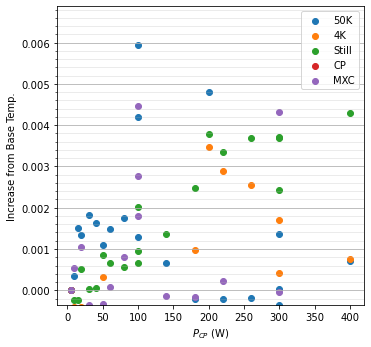

In [8]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 10 &" +
    # "P_CP == 300 &" +
    "P_MXC == 30"
)

x = temp_df["P_CP"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x.idxmin()
y_0 = y[3][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

# axs2 = axs.twinx()
# axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
# axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{CP}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
# axs2.set_ylabel(r"$T_{CP}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

axs.set_ylim(0.006*np.array(axs.get_ylim()))

plt.savefig("CPM Plots/22-08-08/PCPvsAllZoom.png", dpi=400, bbox_inches="tight")

plt.show()

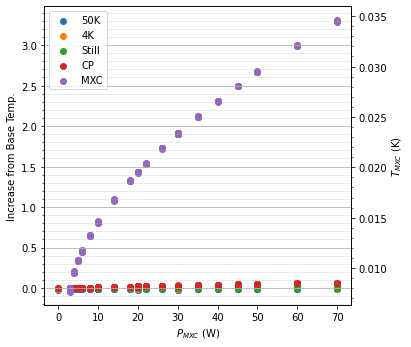

In [27]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    # "P_MXC == 30 &" +
    "P_CP == 0"
)

x = temp_df["P_MXC"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x[y[4].notna()].idxmin()
y_0 = y[4][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

axs2 = axs.twinx()
axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{MXC}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
axs2.set_ylabel(r"$T_{MXC}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-02/PMXCvsAll.png", dpi=400, bbox_inches="tight")

plt.show()

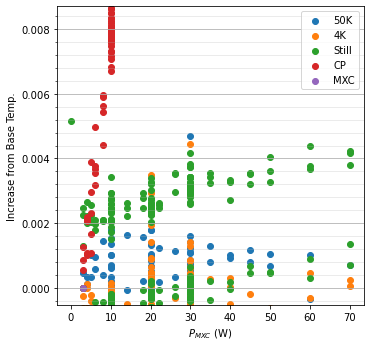

In [9]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    # "P_MXC == 30 &" +
    "P_CP == 0"
)

x = temp_df["P_MXC"]

y = [temp_df["T_"+stage] for stage in stages]
x_min_idx = x[y[4].notna()].idxmin()
y_0 = y[4][x_min_idx]
y = [yi/yi[x_min_idx]-1 for yi in y]

for yi in y:
    axs.scatter(x, yi)

# axs2 = axs.twinx()
# axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.set_ylim(0.0025*np.array(axs.get_ylim()))
# axs2.set_ylim(0.025*np.array(axs2.get_ylim()))

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
# axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{MXC}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
# axs2.set_ylabel(r"$T_{MXC}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
axs.legend(stages)

plt.savefig("CPM Plots/22-08-03/PMXCvsAllZoom2.png", dpi=400, bbox_inches="tight")

plt.show()


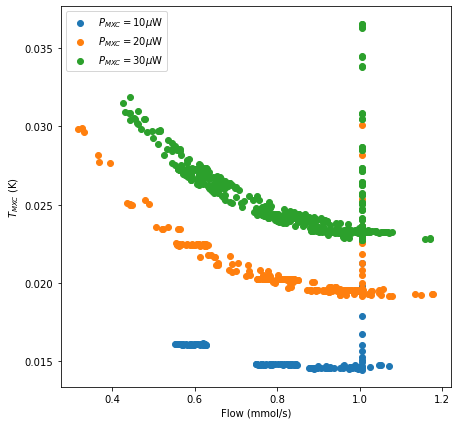

In [12]:
fig, axs = plt.subplots(figsize=(7, 7))

p_mxc = [10, 20, 30]

for p in p_mxc:
    temp_df = cpm_df.query(
        # "P_50K == 0 &" +
        # "P_4K == 0 &" +
        # "P_CP == 0 &" +
        f"P_MXC == {p}"
    )
    
    x = temp_df["Flow"]
    y = temp_df["T_MXC"]

    # y[y==0] = np.nan

    axs.scatter(x, y)

axs.legend([r"$P_{MXC} = 10\mu$W", r"$P_{MXC} = 20\mu$W", r"$P_{MXC} = 30\mu$W"])
axs.set_xlabel(r"Flow (mmol/s)")
axs.set_ylabel(r"$T_{MXC}$ (K)")

plt.savefig("CPM Plots/22-08-03/FlowvsMXC.png", dpi=400, bbox_inches="tight")

plt.show()

## Regression

### Test

In [2]:
def generate_data(t, A, sigma, omega, noise=0):
    y = A * np.exp(-sigma * t) * np.sin(omega * t)
    error = np.random.normal(loc=0.0, scale=noise, size=t.size)
    return y + error

def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

In [4]:
A = 2
sigma = 0.1
omega = 0.1 * 2 * np.pi
x_true = np.array([A, sigma, omega])

noise = 0.1

t_min = 0
t_max = 30

t_train = np.linspace(t_min, t_max, 30)
y_train = generate_data(t_train, A, sigma, omega, noise=noise)

In [5]:
x0 = np.ones(3)

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

In [6]:
t_test = np.linspace(t_min, t_max, 300)
y_test = generate_data(t_test, A, sigma, omega)
y_lsq = generate_data(t_test, *res_lsq.x)

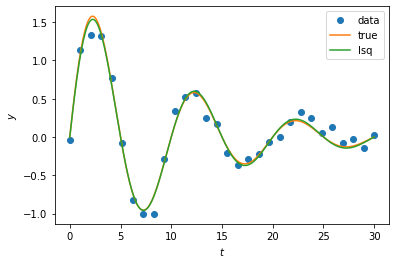

In [7]:
plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_lsq, label='lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()

plt.show()

### On CPM Data

In [4]:
cpm_path = "CPM_data combined.csv"

cpm_df = pd.read_csv(
    cpm_path,
    header=0,
    parse_dates=[0]
)

cpm_df["T_MXC"] = cpm_df["T_MXC"].replace(0, np.nan)

P = cpm_df[["P_50K", "P_4K", "P_Still", "P_CP", "P_MXC"]].to_numpy()
T = cpm_df[["T_50K", "T_4K", "T_Still", "T_CP", "T_MXC"]].to_numpy()

In [23]:
f_T50K = lambda x, P: (
    x[0]*P[:, 0] +
    x[1]*P[:, 1] + 
    x[2]*np.sqrt(P[:, 2] + x[6]**2) +
    x[3]*P[:, 3] +
    x[4]*P[:, 4] +
    x[5]
)

f_T4K = lambda x, P: (
    x[0]*P[:, 0] +
    x[1]*P[:, 1] + 
    x[2]*np.sqrt(P[:, 2] + x[6]) +
    x[3]*P[:, 3] +
    x[4]*P[:, 4] +
    x[5]
)

f_TStill = lambda x, P: (
    x[0]*P[:, 0] +
    x[1]*P[:, 1] + 
    x[2]*np.sqrt(P[:, 2] + x[6]) +
    x[3]*np.sqrt(P[:, 3] + x[7]) +
    x[4]*np.sqrt(P[:, 4] + x[8]) +
    x[5]
)

f_TCP = lambda x, P: (
    x[0]*P[:, 0] +
    x[1]*P[:, 1] + 
    x[2]*np.sqrt(P[:, 2] + x[6]) +
    x[3]*np.sqrt(P[:, 3] + x[7]) +
    x[4]*np.sqrt(P[:, 4] + x[8]) +
    x[5]
)

f_TMXC = lambda x, P: (
    x[0]*P[:, 0] +
    x[1]*P[:, 1] + 
    x[2]*np.sqrt(P[:, 2] + x[6]) +
    x[3]*np.sqrt(P[:, 3] + x[7]) +
    x[4]*np.sqrt(P[:, 4] + x[8]) +
    x[5]
)

In [20]:
def e_T50K(x, P, T):
    return f_T50K(x, P) - T
    
def e_T4K(x, P, T):
    return f_T4K(x, P) - T

def e_TStill(x, P, T):
    return f_TStill(x, P) - T

def e_TCP(x, P, T):
    return f_TCP(x, P) - T

def e_TMXC(x, P, T):
    return f_TMXC(x, P) - T

In [17]:
e_T50K([1, 2, 3, 4, 5, 6, 7], P, T[:, 0])

(1796,)

In [24]:
res_lsq = least_squares(e_T50K, np.zeros(7), args=(P, T[:, 0]))

In [25]:
res_lsq.x

array([ 8.00120657e-01,  1.10434752e-03,  2.59938741e-01,  3.01290524e-03,
       -8.30241333e-04,  4.04292604e+01,  0.00000000e+00])

In [49]:
f_T50K(res_lsq.x, np.array([[0, 0, 6, 0, 30]]))

array([42.1534])

In [46]:
P, T

(array([[  0,   0,   6,   0,  30],
        [  0,   0,   8,   0,  30],
        [  0,   0,  10,   0,  30],
        ...,
        [  4, 100,  20,   0,  30],
        [  4, 100,  25,   0,  30],
        [  4, 100,  30,   0,  30]], dtype=int64),
 array([[4.21534e+01, 3.03733e+00, 8.67754e-01, 6.92066e-02, 3.04376e-02],
        [4.19565e+01, 3.05087e+00, 9.17488e-01, 7.05559e-02, 2.85720e-02],
        [4.18688e+01, 3.06907e+00, 9.60468e-01, 7.22262e-02, 2.72972e-02],
        ...,
        [4.48797e+01, 3.39169e+00, 1.13292e+00, 7.98429e-02, 2.39675e-02],
        [4.49872e+01, 3.41914e+00, 1.18626e+00, 8.20197e-02, 2.35598e-02],
        [4.51263e+01, 3.45154e+00, 1.23127e+00, 8.36012e-02, 2.32140e-02]]))

In [50]:
res_lsq.fun/min(T[:, 0])

array([-2.76565440e-02, -2.03118172e-02, -1.59735951e-02, ...,
       -4.84371843e-05,  6.90318627e-04,  3.16106563e-04])

In [42]:
''.join(["1", "2", "3 "])

'123 '

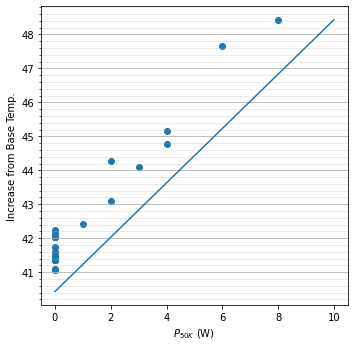

In [67]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    # "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

vals = {}

x = temp_df["P_50K"]
# x = [cpm_df.query(sum[]) for stage in stages]
n = 100
x2 = np.append(np.linspace(0, 10, n+1).reshape(n+1, 1), np.zeros((n+1, 4)), axis=1)

y = temp_df["T_50K"]
y2 = f_T50K(res_lsq.x, x2)

# y = [temp_df["T_"+stage] for stage in stages]
# x_min_idx = x.idxmin()
# y_0 = y[0][x_min_idx]
# y = [yi/yi[x_min_idx]-1 for yi in y]

# for yi in y:
#     axs.scatter(x, yi)

axs.scatter(x, y)

axs.plot(x2[:, 0], y2)

# axs2 = axs.twinx()
# axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
# axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{50K}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
# axs2.set_ylabel(r"$T_{50K}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
# axs.legend(stages)

# plt.savefig("CPM Plots/22-08-02/P50KvsAll.png", dpi=400, bbox_inches="tight")

plt.show()

In [68]:
n = 100
a = np.zeros((n+1, 5))
a[:, 1] = np.linspace(0, 10, n+1)

In [ ]:
fig, axs = plt.subplots(figsize=(5.5, 5.5))

stages = ["50K", "4K", "Still", "CP", "MXC"]

temp_df = cpm_df.query(
    # "P_50K == 0 &" +
    "P_4K == 0 &" +
    "P_Still == 30 &" +
    "P_MXC == 30 &" +
    "P_CP == 0"
)

vals = {}

x = temp_df["P_4K"]
# x = [cpm_df.query(sum[]) for stage in stages]
n = 100
x2 = np.zeros((n+1, 5))
x2[:, 1] = np.linspace(0, 10, n+1)

y = temp_df["T_50K"]
y2 = f_T50K(res_lsq.x, x2)

# y = [temp_df["T_"+stage] for stage in stages]
# x_min_idx = x.idxmin()
# y_0 = y[0][x_min_idx]
# y = [yi/yi[x_min_idx]-1 for yi in y]

# for yi in y:
#     axs.scatter(x, yi)

axs.scatter(x, y)

axs.plot(x2[:, 0], y2)

# axs2 = axs.twinx()
# axs2.set_ylim((np.array(axs.get_ylim())+1)*y_0)

axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
# axs2.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

axs.set_xlabel(r"$P_{50K}$ (W)")
axs.set_ylabel("Increase from Base Temp.")
# axs2.set_ylabel(r"$T_{50K}$ (K)")

axs.grid(True, "minor", "y", lw=0.5, alpha=0.5)
axs.grid(True, "major", "y")
# axs.legend(stages)

# plt.savefig("CPM Plots/22-08-02/P50KvsAll.png", dpi=400, bbox_inches="tight")

plt.show()